# Customer segmentation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
! pip install scikit_posthocs

## Dataset overview

Data source: [Brazilian E-Commerce Public Dataset by Olist](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce)

This is a Brazilian ecommerce public dataset of orders made at _Olist Store_. We are going to perform customer segmentation and provide various insights. The data schema looks like the following.

![](https://i.imgur.com/HRhd2Y0.png)

In [3]:
customers = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv")
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [4]:
sellers = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_sellers_dataset.csv")
sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [5]:
order_reviews = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_order_reviews_dataset.csv")
order_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [6]:
order_items = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv")
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [7]:
products = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv")
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [8]:
geolocation = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_geolocation_dataset.csv")
geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [9]:
product_name = pd.read_csv("/kaggle/input/brazilian-ecommerce/product_category_name_translation.csv")
product_name

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [10]:
orders = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv")
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [11]:
order_payments = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_order_payments_dataset.csv")
order_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


## Feature engineering

In [12]:
# Merge
order_df = order_items.merge(products, how = 'left', on = 'product_id')

# Translating product category name into english
order_df['product_category_name'] = order_df['product_category_name'].replace(dict(zip(product_name['product_category_name'], product_name['product_category_name_english'])))

# Calculate volume of a product
order_df['product_volume'] = order_df['product_length_cm']*order_df['product_height_cm']*order_df['product_width_cm']

# Columns of interest
order_df = order_df[['order_id', 'product_id', 'price', 'freight_value', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_volume']]

# Since there are duplicate reviews for one order, we will drop duplicates and keep the last review
order_reviews = order_reviews.sort_values(by = 'review_creation_date').drop_duplicates('order_id', keep = 'last')

# Merge
order_df = order_df.merge(order_reviews, how = 'left', on = 'order_id')

# whether a review was written or not
order_df['left_review_msg'] = order_df['review_comment_message']
order_df.loc[order_df['left_review_msg'].isna() == False, 'left_review_msg'] = 1
order_df.loc[order_df['left_review_msg'].isna(), 'left_review_msg'] = 0

# Merge
order_df = order_df.merge(orders, how = 'left', on = 'order_id')

# We are only going to deal with orders that were delivered
order_df = order_df.loc[order_df['order_status'] == 'delivered']

# columns of interest
order_df = order_df.drop(['order_id', 'product_id', 'order_status', 'review_id', 'review_comment_title', 'review_answer_timestamp', 'review_comment_message'], axis = 1)

order_df

,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_volume,review_score,review_creation_date,left_review_msg,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,3528.0,5.0,2017-09-21 00:00:00,1,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,60000.0,4.0,2017-05-13 00:00:00,0,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,199.00,17.87,furniture_decor,59.0,695.0,2.0,3050.0,14157.0,5.0,2018-01-23 00:00:00,1,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
3,12.99,12.79,perfumery,42.0,480.0,1.0,200.0,2400.0,4.0,2018-08-15 00:00:00,0,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
4,199.90,18.14,garden_tools,59.0,409.0,1.0,3750.0,42000.0,5.0,2017-03-02 00:00:00,1,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,299.99,43.41,housewares,43.0,1002.0,3.0,10150.0,53400.0,5.0,2018-05-11 00:00:00,0,b51593916b4b8e0d6f66f2ae24f2673d,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18 00:00:00
112646,350.00,36.53,computers_accessories,31.0,232.0,1.0,8950.0,44460.0,5.0,2018-07-24 00:00:00,0,84c5d4fbaf120aae381fad077416eaa0,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01 00:00:00
112647,99.90,16.95,sports_leisure,43.0,869.0,1.0,967.0,9576.0,5.0,2017-10-29 00:00:00,0,29309aa813182aaddc9b259e31b870e6,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10 00:00:00
112648,55.99,8.72,computers_accessories,56.0,1306.0,1.0,100.0,8000.0,5.0,2017-08-17 00:00:00,1,b5e6afd5a41800fdf401e0272ca74655,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25 00:00:00


In [13]:
# Checking datatype and NA
print(order_df.info())
print(order_df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 110197 entries, 0 to 112649
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   price                          110197 non-null  float64
 1   freight_value                  110197 non-null  float64
 2   product_category_name          108660 non-null  object 
 3   product_name_lenght            108660 non-null  float64
 4   product_description_lenght     108660 non-null  float64
 5   product_photos_qty             108660 non-null  float64
 6   product_weight_g               110179 non-null  float64
 7   product_volume                 110179 non-null  float64
 8   review_score                   109370 non-null  float64
 9   review_creation_date           109370 non-null  object 
 10  left_review_msg                110197 non-null  object 
 11  customer_id                    110197 non-null  object 
 12  order_purchase_timestamp       1101

In [14]:
# Since we have enough data, we will remove rows with NA
order_df = order_df.loc[order_df.isna().any(axis = 1) == False]

# actual time it took for delivery from purchase time by days
order_df['actual_delivery_days'] = (pd.to_datetime(order_df['order_delivered_customer_date']) - pd.to_datetime(order_df['order_purchase_timestamp'])).dt.days

# estimated time for delivery from purchase time by days
order_df['estimated_delivery_days'] = (pd.to_datetime(order_df['order_estimated_delivery_date']) - pd.to_datetime(order_df['order_purchase_timestamp'])).dt.days

# Difference between actual and estimated time of delivery by days
order_df['diff_estimated_actual_delivery_days'] = (pd.to_datetime(order_df['order_estimated_delivery_date']) - pd.to_datetime(order_df['order_delivered_customer_date'])).dt.days

# time it took for customer to leave a review from purchase time
order_df['review_days_from_purchase'] = (pd.to_datetime(order_df['review_creation_date']) - pd.to_datetime(order_df['order_purchase_timestamp'])).dt.days

# to datetime type
order_df['order_purchase_timestamp'] = pd.to_datetime(order_df['order_purchase_timestamp'])

# Columns of interest
order_df = order_df.drop(['review_creation_date', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'], axis = 1)

In [15]:
# Pivoting the dataframe with order_id to dataframe with customer_id
customer_product_category = pd.crosstab(order_df['customer_id'], order_df['product_category_name']).reset_index().rename_axis(columns = None)
customer_order_counts = pd.DataFrame(order_df.groupby('customer_id')['price'].count()).reset_index().rename(columns = {'price': 'count'})
customer_order_weekday = pd.crosstab(order_df['customer_id'], order_df['order_purchase_timestamp'].dt.day_name()).reset_index().rename_axis(columns = None)
customer_order_month = pd.crosstab(order_df['customer_id'], order_df['order_purchase_timestamp'].dt.month_name()).reset_index().rename_axis(columns = None)

customer_df = order_df.drop(['product_category_name', 'order_purchase_timestamp'], axis = 1).groupby('customer_id').mean().reset_index()
customer_df = customer_df.merge(customer_product_category, how = 'left', on = 'customer_id')
customer_df = customer_df.merge(customer_order_counts, how = 'left', on = 'customer_id')
customer_df = customer_df.merge(customer_order_weekday, how = 'left', on = 'customer_id')
customer_df = customer_df.merge(customer_order_month, how = 'left', on = 'customer_id')

customer_df = customer_df.drop('customer_id', axis = 1)

### Final dataframes

In [16]:
# Order dataframe
order_df

,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_volume,review_score,left_review_msg,customer_id,order_purchase_timestamp,actual_delivery_days,estimated_delivery_days,diff_estimated_actual_delivery_days,review_days_from_purchase
0,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,3528.0,5.0,1,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,7,15,8,7
1,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,60000.0,4.0,0,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06,16,18,2,16
2,199.00,17.87,furniture_decor,59.0,695.0,2.0,3050.0,14157.0,5.0,1,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,7,21,13,8
3,12.99,12.79,perfumery,42.0,480.0,1.0,200.0,2400.0,4.0,0,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08 10:00:35,6,11,5,6
4,199.90,18.14,garden_tools,59.0,409.0,1.0,3750.0,42000.0,5.0,1,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04 13:57:51,25,40,15,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,299.99,43.41,housewares,43.0,1002.0,3.0,10150.0,53400.0,5.0,0,b51593916b4b8e0d6f66f2ae24f2673d,2018-04-23 13:57:06,17,24,7,17
112646,350.00,36.53,computers_accessories,31.0,232.0,1.0,8950.0,44460.0,5.0,0,84c5d4fbaf120aae381fad077416eaa0,2018-07-14 10:26:46,9,17,8,9
112647,99.90,16.95,sports_leisure,43.0,869.0,1.0,967.0,9576.0,5.0,0,29309aa813182aaddc9b259e31b870e6,2017-10-23 17:07:56,4,17,12,5
112648,55.99,8.72,computers_accessories,56.0,1306.0,1.0,100.0,8000.0,5.0,1,b5e6afd5a41800fdf401e0272ca74655,2017-08-14 23:02:59,1,10,8,2


In [17]:
# Customer dataframe
customer_df

,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_volume,review_score,left_review_msg,actual_delivery_days,...,December,February,January,July,June,March,May,November,October,September
0,89.80,24.94,55.0,889.0,1.0,4267.0,39468.0,1.0,1.0,13.0,...,0,0,0,0,0,0,0,1,0,0
1,54.90,12.51,57.0,2563.0,2.0,150.0,352.0,4.0,0.0,9.0,...,0,0,0,1,0,0,0,0,0,0
2,179.99,15.43,45.0,1042.0,2.0,750.0,16905.0,5.0,1.0,5.0,...,0,1,0,0,0,0,0,0,0,0
3,149.90,29.45,38.0,840.0,1.0,1600.0,28800.0,5.0,0.0,28.0,...,0,0,0,0,0,0,0,0,0,0
4,93.00,14.01,57.0,364.0,2.0,800.0,15300.0,4.0,0.0,11.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94480,78.00,13.91,39.0,2244.0,1.0,1250.0,3080.0,5.0,1.0,4.0,...,0,0,0,0,0,1,0,0,0,0
94481,54.90,26.46,48.0,641.0,3.0,2050.0,20000.0,3.0,0.0,12.0,...,0,0,0,0,0,1,0,0,0,0
94482,47.90,15.23,59.0,458.0,4.0,350.0,12000.0,4.0,0.0,17.0,...,0,0,0,0,0,0,1,0,0,0
94483,199.90,14.23,60.0,268.0,1.0,2700.0,11808.0,5.0,1.0,5.0,...,0,0,0,0,1,0,0,0,0,0


## Customer segmentation

In [18]:
customer_df

,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_volume,review_score,left_review_msg,actual_delivery_days,...,December,February,January,July,June,March,May,November,October,September
0,89.80,24.94,55.0,889.0,1.0,4267.0,39468.0,1.0,1.0,13.0,...,0,0,0,0,0,0,0,1,0,0
1,54.90,12.51,57.0,2563.0,2.0,150.0,352.0,4.0,0.0,9.0,...,0,0,0,1,0,0,0,0,0,0
2,179.99,15.43,45.0,1042.0,2.0,750.0,16905.0,5.0,1.0,5.0,...,0,1,0,0,0,0,0,0,0,0
3,149.90,29.45,38.0,840.0,1.0,1600.0,28800.0,5.0,0.0,28.0,...,0,0,0,0,0,0,0,0,0,0
4,93.00,14.01,57.0,364.0,2.0,800.0,15300.0,4.0,0.0,11.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94480,78.00,13.91,39.0,2244.0,1.0,1250.0,3080.0,5.0,1.0,4.0,...,0,0,0,0,0,1,0,0,0,0
94481,54.90,26.46,48.0,641.0,3.0,2050.0,20000.0,3.0,0.0,12.0,...,0,0,0,0,0,1,0,0,0,0
94482,47.90,15.23,59.0,458.0,4.0,350.0,12000.0,4.0,0.0,17.0,...,0,0,0,0,0,0,1,0,0,0
94483,199.90,14.23,60.0,268.0,1.0,2700.0,11808.0,5.0,1.0,5.0,...,0,0,0,0,1,0,0,0,0,0


Let's first scale the data.

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(customer_df))
scaled_df.columns = customer_df.columns

### PCA analysis

Let's implement dimensionality reduction using PCA for visualization of the clusters.

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 10, random_state = 5)
pca = pca.fit(customer_df)

tmp = pd.DataFrame({'n_c': range(1, 10 + 1), 'var': pca.explained_variance_ratio_})

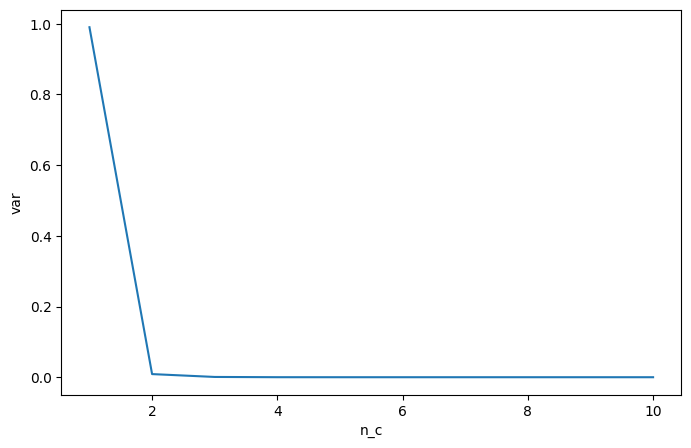

In [21]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.lineplot(data = tmp, x = 'n_c', y = 'var');

Setting 2 for number of components for PCA seems adequate by elbow method.

In [22]:
pca = PCA(n_components = 2, random_state = 5)
pca_df = pd.DataFrame(pca.fit_transform(scaled_df))
pca_df.columns = ['pc1', 'pc2']

print(pca.explained_variance_ratio_)

[0.53656668 0.19937967]


We can see that most of the variance is explained by two principal components.

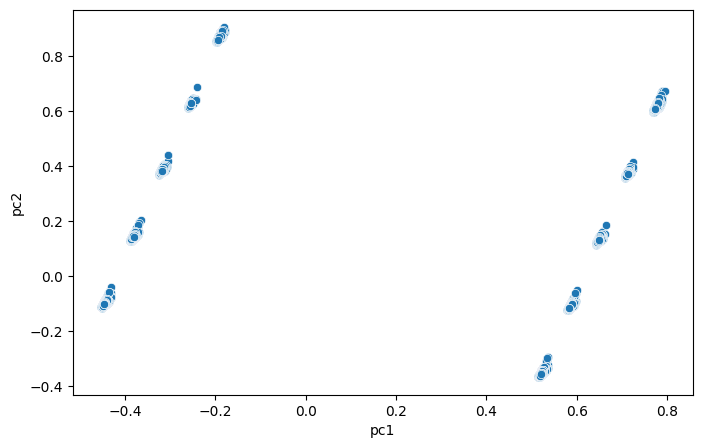

In [23]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.scatterplot(data = pca_df, x = 'pc1', y = 'pc2');

There clearly seems to be a total of 10 clusters which are separate from each other.

### Cluster analysis

Let's perform clustering using Kmeans.

In [24]:
from sklearn.cluster import KMeans

inertia = []

for k in range(2, 20 + 1):
    kmeans = KMeans(n_clusters = k, random_state = 5).fit(pca_df)
    inertia.append(kmeans.inertia_)
    
tmp = pd.DataFrame({'n': range(1, 19 + 1), 'inertia': inertia})

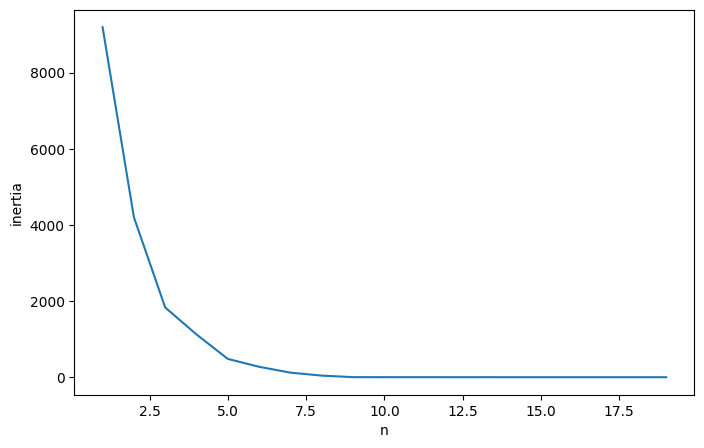

In [25]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.lineplot(data = tmp, x = 'n', y = 'inertia');

By elbow method, we can try setting the number of clusters to 5. However, since we can clearly see the 10 distinct clusters on the scatter plot, we will set the number of clusters to 10.

In [26]:
kmeans = KMeans(n_clusters = 10, random_state = 5).fit(pca_df)
clusters = kmeans.predict(pca_df)
pca_df['cluster'] = clusters

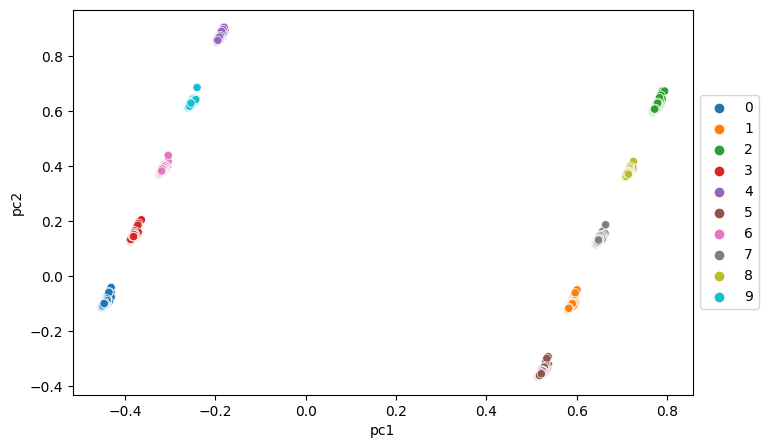

In [27]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.scatterplot(data = pca_df, x = 'pc1', y = 'pc2', hue = 'cluster', palette = sns.color_palette('tab10'), ax = ax);
ax.legend(loc = 'center left', bbox_to_anchor = (1, 0.5));

In [28]:
customer_df = pd.concat([pd.DataFrame({'cluster': clusters}), customer_df], axis = 1)

Let's analyze the characteristics of each cluster.

In [29]:
print(customer_df.columns[:40])
print(customer_df.columns[40:])

Index(['cluster', 'price', 'freight_value', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_volume', 'review_score', 'left_review_msg',
       'actual_delivery_days', 'estimated_delivery_days',
       'diff_estimated_actual_delivery_days', 'review_days_from_purchase',
       'agro_industry_and_commerce', 'air_conditioning', 'art',
       'arts_and_craftmanship', 'audio', 'auto', 'baby', 'bed_bath_table',
       'books_general_interest', 'books_imported', 'books_technical',
       'cds_dvds_musicals', 'christmas_supplies', 'cine_photo', 'computers',
       'computers_accessories', 'consoles_games',
       'construction_tools_construction', 'construction_tools_lights',
       'construction_tools_safety', 'cool_stuff', 'costruction_tools_garden',
       'costruction_tools_tools', 'diapers_and_hygiene', 'drinks',
       'dvds_blu_ray'],
      dtype='object')
Index(['electronics', 'fashio_female_clothing', 'fashion_bags_a

In [30]:
customer_df.iloc[:,:14].groupby('cluster').mean().sort_values(by = ['review_score', 'left_review_msg'])

,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_volume,review_score,left_review_msg,actual_delivery_days,estimated_delivery_days,diff_estimated_actual_delivery_days,review_days_from_purchase
cluster,,,,,,,,,,,,,
4,123.739255,21.373679,48.903063,769.506753,2.197442,2154.462066,15848.767416,1.0,0.0,23.832286,23.854036,-0.395360,19.277912
2,138.423919,21.739751,49.056310,788.513229,2.149564,2428.203455,16854.047348,1.0,1.0,20.057235,24.469273,4.012938,16.837154
9,115.247057,20.553615,48.889996,720.571199,2.184038,2232.196641,16065.507584,2.0,0.0,17.304442,24.206934,6.475623,15.957746
8,124.904822,21.530852,49.375132,745.475505,2.224356,2392.336570,16891.562533,2.0,1.0,15.514578,24.207161,8.292072,14.457801
6,110.616898,20.086636,49.209034,775.120422,2.292584,2027.918452,14752.828607,3.0,0.0,13.616667,23.813739,9.796396,13.586036
7,118.475699,20.788564,49.271396,772.161006,2.241938,2377.153884,16655.454069,3.0,1.0,14.027417,24.191038,9.745578,13.663325
3,121.324681,20.029227,49.060163,802.026582,2.270913,2074.636333,14861.918484,4.0,0.0,11.716416,23.413395,11.291546,11.992428
1,125.029274,20.765168,49.378612,787.271959,2.294510,2237.071043,15896.834941,4.0,1.0,12.114576,24.101482,11.582012,12.282736
0,122.446121,19.511270,48.550098,802.138306,2.248132,1958.459470,14489.925061,5.0,0.0,10.128871,22.773758,12.244430,10.511252


Let's change the labeling of cluster in ascending order of review_score and left_review_msg so that we can take advantage of the ordinal nature of review scores.

In [31]:
customer_df['cluster'] = customer_df['cluster'].replace({4: 0, 2: 1, 9: 2, 8: 3, 6: 4, 7: 5, 3: 6, 1: 7, 0: 8, 5: 9})

In [32]:
print(customer_df['cluster'].value_counts())

cluster
8    35904
9    20076
6    12811
1     7111
7     5804
4     4440
5     3392
0     2069
3     1955
2      923
Name: count, dtype: int64


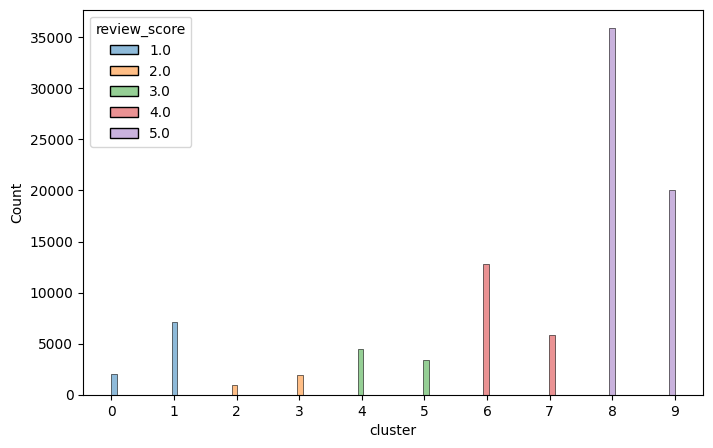

In [33]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.histplot(data = customer_df, x = 'cluster', hue = 'review_score', palette = sns.color_palette('tab10'), ax = ax);
ax.set(xticks = range(10));

In [34]:
customer_df.iloc[:,:14].groupby('cluster').mean().sort_values(by = ['review_score', 'left_review_msg'])

,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_volume,review_score,left_review_msg,actual_delivery_days,estimated_delivery_days,diff_estimated_actual_delivery_days,review_days_from_purchase
cluster,,,,,,,,,,,,,
0,123.739255,21.373679,48.903063,769.506753,2.197442,2154.462066,15848.767416,1.0,0.0,23.832286,23.854036,-0.395360,19.277912
1,138.423919,21.739751,49.056310,788.513229,2.149564,2428.203455,16854.047348,1.0,1.0,20.057235,24.469273,4.012938,16.837154
2,115.247057,20.553615,48.889996,720.571199,2.184038,2232.196641,16065.507584,2.0,0.0,17.304442,24.206934,6.475623,15.957746
3,124.904822,21.530852,49.375132,745.475505,2.224356,2392.336570,16891.562533,2.0,1.0,15.514578,24.207161,8.292072,14.457801
4,110.616898,20.086636,49.209034,775.120422,2.292584,2027.918452,14752.828607,3.0,0.0,13.616667,23.813739,9.796396,13.586036
5,118.475699,20.788564,49.271396,772.161006,2.241938,2377.153884,16655.454069,3.0,1.0,14.027417,24.191038,9.745578,13.663325
6,121.324681,20.029227,49.060163,802.026582,2.270913,2074.636333,14861.918484,4.0,0.0,11.716416,23.413395,11.291546,11.992428
7,125.029274,20.765168,49.378612,787.271959,2.294510,2237.071043,15896.834941,4.0,1.0,12.114576,24.101482,11.582012,12.282736
8,122.446121,19.511270,48.550098,802.138306,2.248132,1958.459470,14489.925061,5.0,0.0,10.128871,22.773758,12.244430,10.511252


There are several key insights we can take from this:

1. Most customers are grouped on cluster 0 and 5 which gave review scores of 5. This means that most customers tend to leave a good review. (See: `review_score`)
2. There are clusters are formed based on two categories: review score and whether or not a review message was written. (See: `review_score`, `left_review_msg`, where `left_review_msg == 1` means review message was written)
3. Customers tend to leave review messages when they give low review scores while customers tend to not leave review messages when they give high review scores. (See: `review_score`, `left_review_msg`)
4. Most estimated days for delivery from the time at purchase is around 23-24 days or 3 weeks. (See: `estimated_delivery_days`)
5. The review score is positively correlated with the difference between estimated and actual delivery days where shorter time taken for delivery has higher review scores. (See: `review_score`, `diff_estimated_actual_delivery_days` where positive value means the actual delivery date was earlier than estimated)
6. Cluster that purchased expensive items with long delivery time has very low review scores while cluster that purchased expensive items with short delivery time has excellent review scores. (See: `price`, `review_score`, `diff_estimated_actual_delivery_days`)
7. Customers tend to leave a review score faster for higher review scores. (See: `review_days_from_purchase` which is the days taken for customers to leave review scores since their purchase time)

In [35]:
customer_df.iloc[:, [0] + list(range(87, 107))].groupby('cluster').mean().sort_values(by = 'count')[['count', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']]

,count,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,January,February,March,April,May,June,July,August,September,October,November,December
cluster,,,,,,,,,,,,,,,,,,,,
9,1.108039,0.182058,0.181012,0.180365,0.164077,0.152222,0.120442,0.127864,0.086521,0.084977,0.094690,0.108338,0.124228,0.113469,0.124328,0.126270,0.054941,0.060221,0.071429,0.058627
8,1.109598,0.185662,0.181428,0.173741,0.163993,0.153910,0.116617,0.134247,0.086954,0.083389,0.098541,0.102858,0.123412,0.114277,0.125585,0.134330,0.047042,0.052724,0.080715,0.059770
6,1.110452,0.178362,0.180002,0.174694,0.164234,0.159004,0.119585,0.134572,0.086800,0.092186,0.110296,0.109906,0.124893,0.102490,0.105456,0.124502,0.049098,0.055265,0.086098,0.063461
4,1.113739,0.168694,0.164414,0.170721,0.174775,0.171622,0.123198,0.140315,0.096396,0.106081,0.125676,0.110360,0.118694,0.088063,0.103378,0.102928,0.043919,0.053378,0.103153,0.061712
7,1.128704,0.174535,0.182805,0.178842,0.172467,0.164197,0.125603,0.130255,0.086837,0.088215,0.108890,0.110786,0.121640,0.106134,0.124225,0.121468,0.048587,0.065817,0.082357,0.063749
2,1.140845,0.195016,0.174431,0.147346,0.179848,0.164680,0.128927,0.150596,0.091008,0.123510,0.128927,0.145179,0.094258,0.086674,0.099675,0.094258,0.045504,0.035753,0.114843,0.081257
5,1.224941,0.196344,0.192217,0.171580,0.193986,0.185731,0.141509,0.143573,0.111439,0.122052,0.129422,0.100825,0.134139,0.116156,0.117040,0.109965,0.047465,0.066038,0.101710,0.068691
0,1.225230,0.179797,0.183664,0.189464,0.203480,0.194780,0.128081,0.145964,0.099565,0.162397,0.185597,0.111648,0.097632,0.072015,0.086515,0.088449,0.038666,0.058482,0.134364,0.089899
3,1.309463,0.218926,0.223018,0.192327,0.191304,0.202558,0.137084,0.144246,0.121739,0.129412,0.139130,0.126854,0.107417,0.125320,0.118159,0.136061,0.049616,0.061893,0.114066,0.079795


In [36]:
# Average of all customers
pd.DataFrame(customer_df.iloc[:, list(range(87, 107))].mean()).transpose()[['count', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']]

,count,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,January,February,March,April,May,June,July,August,September,October,November,December
0,1.141144,0.185966,0.185151,0.178028,0.170355,0.162735,0.122781,0.136127,0.091708,0.09647,0.112579,0.107763,0.122834,0.109594,0.118463,0.124411,0.049013,0.057226,0.087707,0.063375


Key insight to take from this:

1. Customers who purchase more items tend to leave lower review scores since the cluster labels are in ascending order of review score. (See: `cluster`, `count`)
2. Customers tend to buy the most on weekdays rather than weekends. (See: `Monday` - `Sunday`)
3. Customers tend to by the most from March to August and it drops sharply on September. (See: `January` - `December`)

### Statistical analysis

Let's perform ANOVA on difference between estimated and actual delivery time to see which clusters differ in average days it took their products to be delivered earlier than estimated since they purchased.

Since there are 10 clusters which are too many to compare at the same time, we will only consider the clusters that didn't leave review messages which would be cluster 0, 2, 4, 6, 8.

In [37]:
from scipy import stats

tmp = []
for i in range(0, 10, 2):
    tmp.append(customer_df[customer_df['cluster'] == i]['diff_estimated_actual_delivery_days'].tolist())

# Check the assumption of normality
# H0: Residuals are normally distributed
for i in range(0, 10, 2):
    print(f"Normality test for Cluster {i}: {stats.shapiro(tmp[i//2])}")
    print()
    
# Check the assumptions of equal variance
# H0: The variances are equal for all groups
print(f"Equal variance test: {stats.levene(tmp[0], tmp[1], tmp[2], tmp[3], tmp[4])}")

Normality test for Cluster 0: ShapiroResult(statistic=0.9715433716773987, pvalue=7.757621609479365e-20)

Normality test for Cluster 2: ShapiroResult(statistic=0.8302336931228638, pvalue=3.485847811431253e-30)

Normality test for Cluster 4: ShapiroResult(statistic=0.8822038769721985, pvalue=0.0)

Normality test for Cluster 6: ShapiroResult(statistic=0.8543376922607422, pvalue=0.0)

Normality test for Cluster 8: ShapiroResult(statistic=0.9073260426521301, pvalue=0.0)

Equal variance test: LeveneResult(statistic=596.8021381388141, pvalue=0.0)


Since the normality assumption is not satisfied, we have to use nonparametric method.

In [38]:
# H0: The medians of the groups are equal
# H1: At least one of the medians is different than of others
stats.kruskal(tmp[0], tmp[1], tmp[2], tmp[3], tmp[4])

KruskalResult(statistic=2003.1322564153163, pvalue=0.0)

We reject H0, so we can say that at significance level 0.05, the medians of the groups are not equal. Let's perform post hoc analysis.

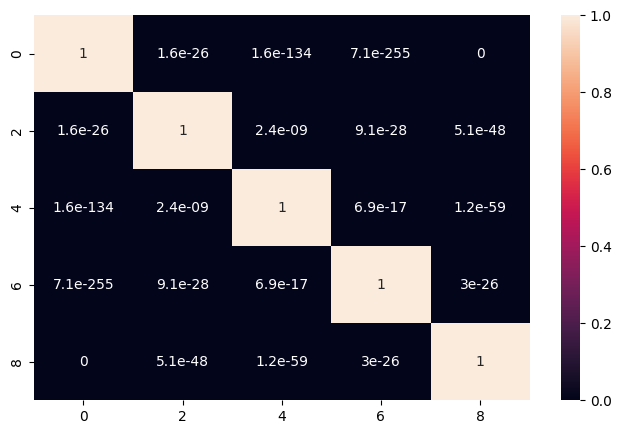

In [39]:
from scikit_posthocs import posthoc_dunn

posthoc = posthoc_dunn(tmp, p_adjust = 'bonferroni')  # Bonferroni correction to account for multiple comparisons
posthoc.index = [0, 2, 4, 6, 8]
posthoc.columns =  [0, 2, 4, 6, 8]

fig, ax = plt.subplots(figsize = (8, 5))
sns.heatmap(posthoc, annot = True);

Post hoc analysis suggests that all of these clusters have different medians of the difference in delivery time than each other.

In [40]:
customer_df[['cluster', 'diff_estimated_actual_delivery_days']].groupby('cluster').median().loc[[0, 2, 4, 6, 8]]

,diff_estimated_actual_delivery_days
cluster,
0,-1.0
2,8.0
4,10.0
6,11.0
8,12.0


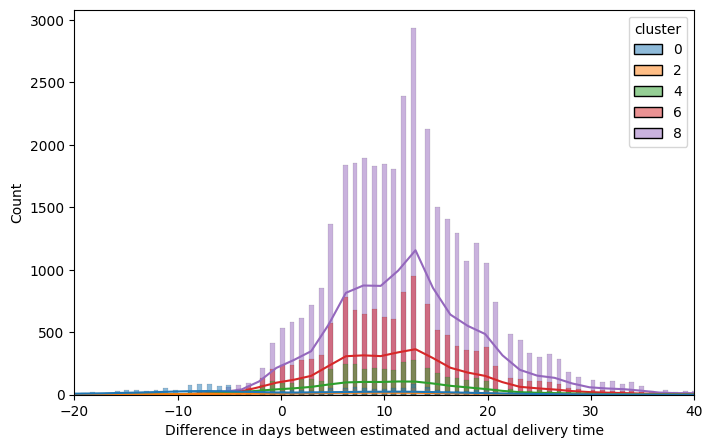

In [41]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.histplot(data = customer_df[customer_df['cluster'].isin([0, 2, 4, 6, 8])], x = 'diff_estimated_actual_delivery_days', hue = 'cluster', kde = True, palette = sns.color_palette('tab10'), ax = ax);
ax.set_xlim(-20, 40);
ax.set(xlabel = 'Difference in days between estimated and actual delivery time');

We can also easily see the difference in median for each cluster by the table and histogram.

## Future plans

There are still way more tasks that can be performed with this dataset: we can analyze the sellers, identify the best selling product categories, and many more.